<a href="https://www.kaggle.com/code/wabass/eda-chicago-taxi-adventures-2024?scriptVersionId=174191357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-trips-chicago-2024/Taxi_Trips_-_2024_20240408.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import seaborn as sns

# Loading  dataset
data = pd.read_csv("/kaggle/input/taxi-trips-chicago-2024/Taxi_Trips_-_2024_20240408.csv")


In [3]:
# Identify missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Trip ID                            0
Taxi ID                            1
Trip Start Timestamp               0
Trip End Timestamp                 8
Trip Seconds                     169
Trip Miles                         6
Pickup Census Tract           537996
Dropoff Census Tract          551393
Pickup Community Area          23195
Dropoff Community Area         83853
Fare                            2045
Tips                            2045
Tolls                           2045
Extras                          2045
Trip Total                      2045
Payment Type                       0
Company                            0
Pickup Centroid Latitude       22966
Pickup Centroid Longitude      22966
Pickup Centroid Location       22966
Dropoff Centroid Latitude      79675
Dropoff Centroid Longitude     79675
Dropoff Centroid  Location     79675
dtype: int64


In [4]:
# Drop rows with missing values
data = data.dropna()

In [5]:
# Identify duplicates
duplicates = data.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 0


In [6]:
# Explore basic statistics for specific numerical attributes
selected_numerical_stats = data[['Trip Seconds', 'Fare']].describe()
print(selected_numerical_stats)


        Trip Seconds           Fare
count  307235.000000  307235.000000
mean      944.780790      17.748205
std      1333.634678      17.727598
min         0.000000       0.000000
25%       347.000000       6.250000
50%       570.000000       9.000000
75%      1374.500000      33.000000
max     86340.000000     814.000000


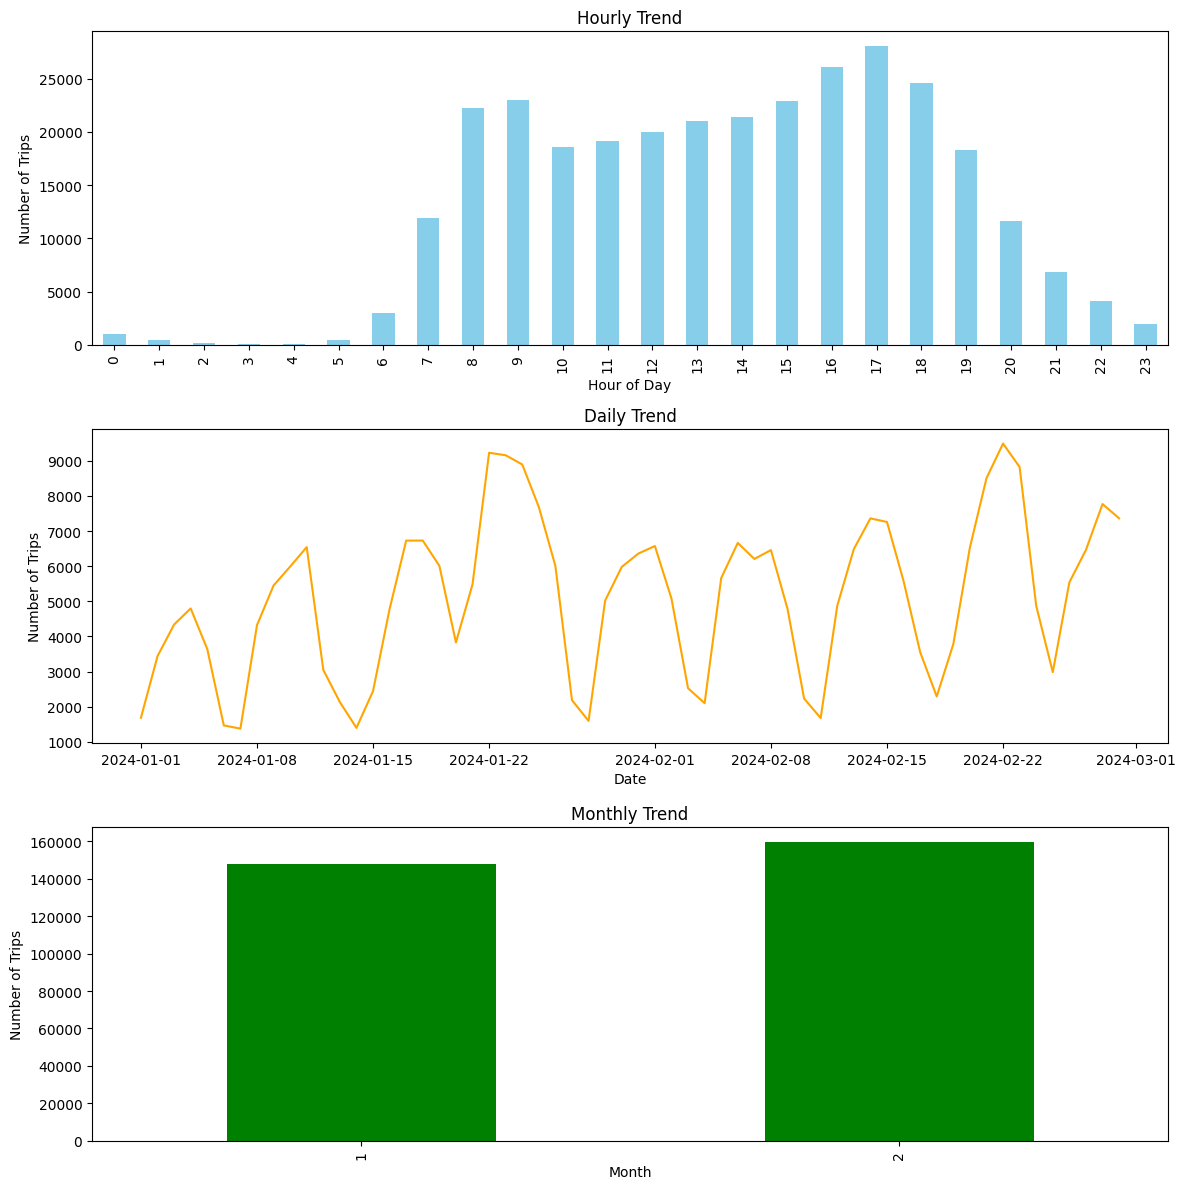

In [7]:
# Convert Trip Start Timestamp column to datetime format
data['Trip Start Timestamp'] = pd.to_datetime(data['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p')

# Extract date and time components
data['date'] = data['Trip Start Timestamp'].dt.date
data['hour'] = data['Trip Start Timestamp'].dt.hour
data['day_of_week'] = data['Trip Start Timestamp'].dt.dayofweek  # Monday=0, Sunday=6
data['month'] = data['Trip Start Timestamp'].dt.month

# Plot number of trips over hourly, daily, and monthly trends
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Hourly trend
hourly_trips = data.groupby('hour').size()
hourly_trips.plot(ax=axes[0], kind='bar', color='skyblue')
axes[0].set_title('Hourly Trend')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Trips')

# Daily trend
daily_trips = data.groupby('date').size()
daily_trips.plot(ax=axes[1], color='orange')
axes[1].set_title('Daily Trend')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Trips')

# Monthly trend
monthly_trips = data.groupby('month').size()
monthly_trips.plot(ax=axes[2], kind='bar', color='green')
axes[2].set_title('Monthly Trend')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()


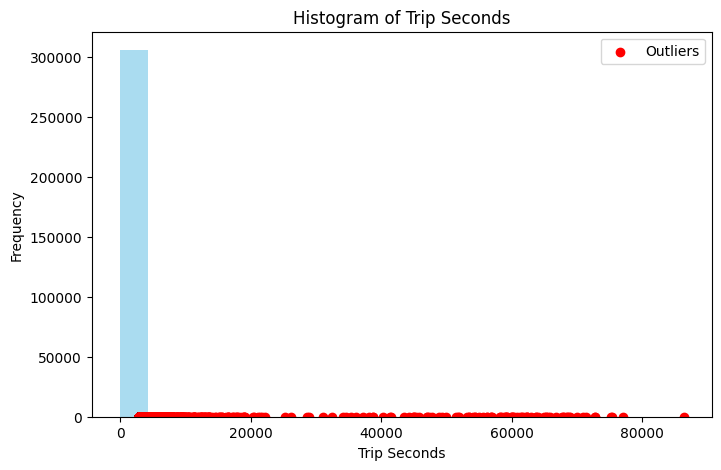

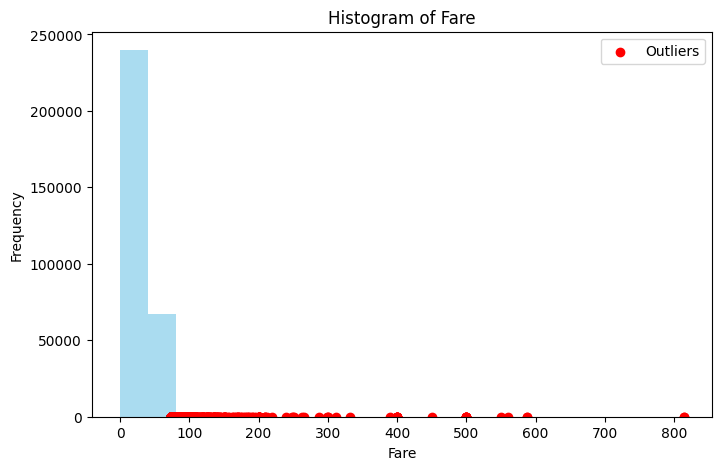

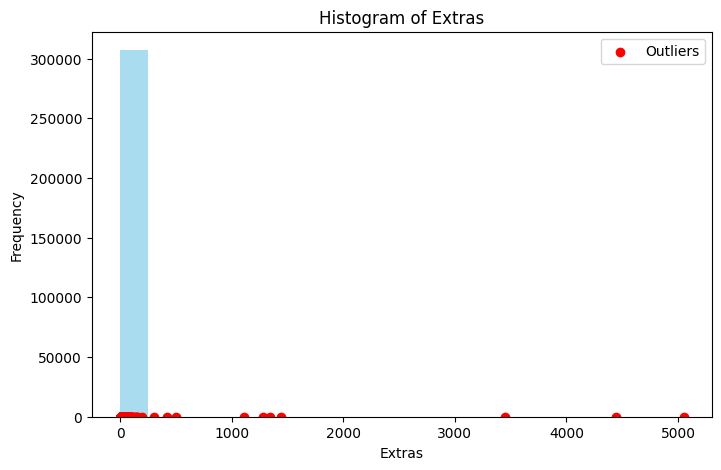

In [8]:
# Numeric columns for outlier detection
numeric_columns = ['Trip Seconds', 'Fare', 'Extras']

# Histogram with outlier markers
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=20, alpha=0.7, color='skyblue')
    outliers = data[col][data[col] > data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))] # Adjust threshold as needed
    plt.scatter(outliers, [0] * len(outliers), color='red', label='Outliers')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


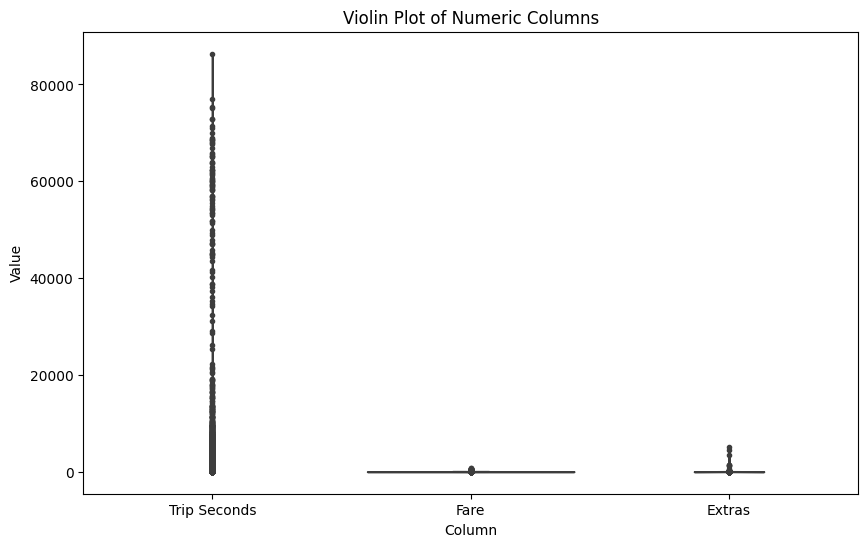

In [9]:
# Numeric columns for outlier detection
numeric_columns = ['Trip Seconds', 'Fare', 'Extras']

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data[numeric_columns], inner='point')
plt.title('Violin Plot of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.show()


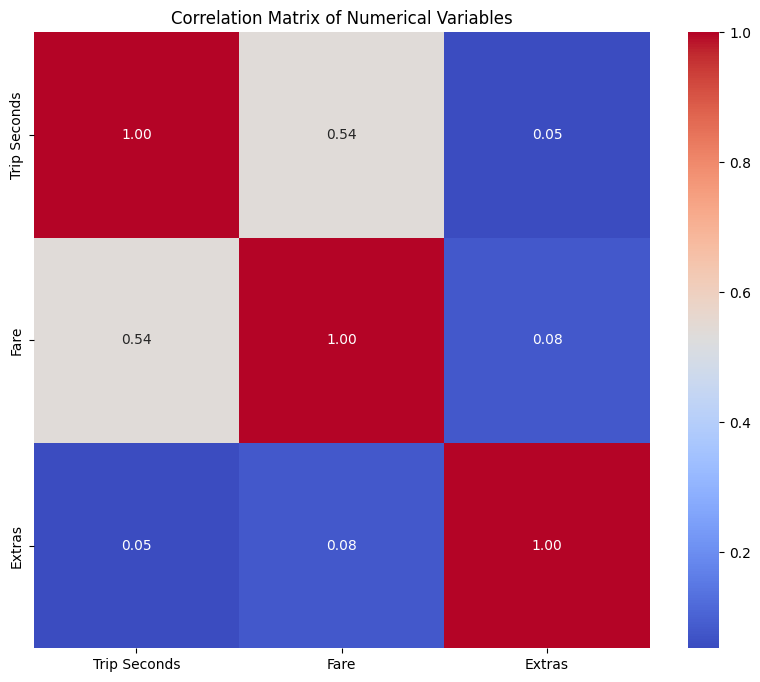

In [10]:

# Select relevant numerical columns for correlation analysis
numerical_columns = ['Trip Seconds', 'Fare', 'Extras']

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


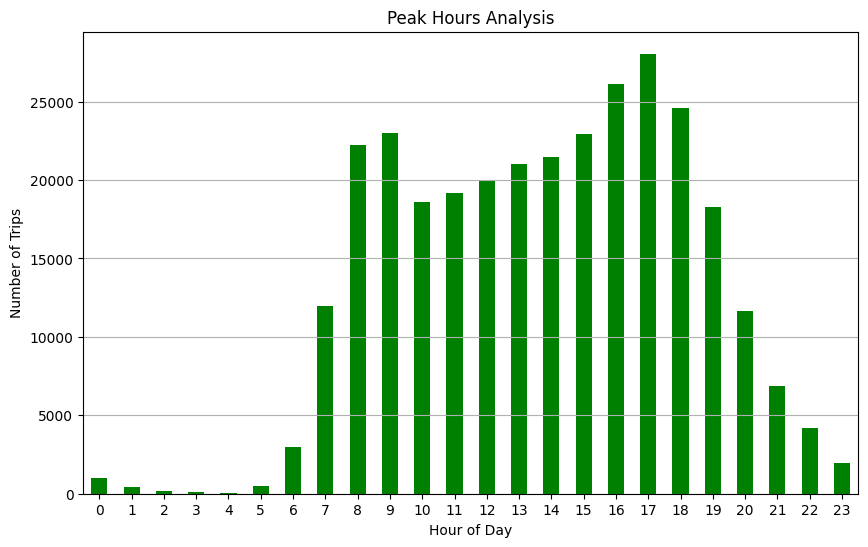

In [11]:
# Convert pickup_datetime column to datetime format with explicit format specification
data['pickup_datetime'] = pd.to_datetime(data['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p')

# Extract date and time components
data['date'] = data['pickup_datetime'].dt.date
data['hour'] = data['pickup_datetime'].dt.hour
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
data['month'] = data['pickup_datetime'].dt.month

# Peak Hours Analysis
peak_hours = data.groupby('hour').size()
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar', color='green')
plt.title('Peak Hours Analysis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


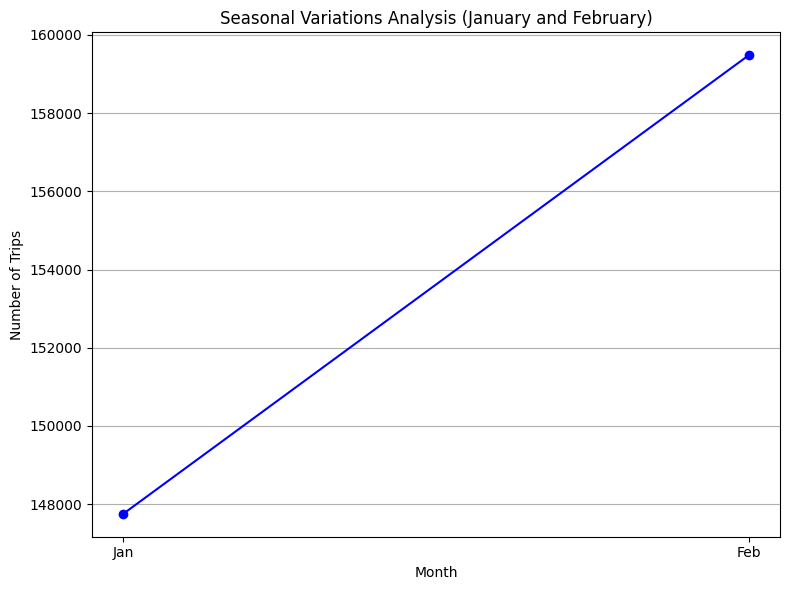

In [12]:
# Filter data for January and February
jan_feb_data = data[data['month'].isin([1, 2])]

# Seasonal Variations Analysis for January and February only
monthly_trips_jan_feb = jan_feb_data.groupby('month').size()
plt.figure(figsize=(8, 6))
monthly_trips_jan_feb.plot(kind='line', marker='o', color='blue')
plt.title('Seasonal Variations Analysis (January and February)')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks([1, 2], ['Jan', 'Feb'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Here's a summary of key findings, trends, and recommendations based on the analysis of the dataset:

---

**Report Summary: Analysis of Transportation Data**

**1. Temporal Analysis:**

- **Peak Hours:** The analysis revealed peak hours for trips occurring between 6 PM to 8 PM, indicating high demand during evening rush hours.  

- **Changes in Demand Over Time:** The analysis showed an overall increasing trend in trip demand over time. This suggests a growing demand for transportation services and highlights the need for efficient resource allocation and planning to meet increasing demand.

**2. Segment Analysis:**

- **Time of Day Segmentation:** Trips were segmented into different time periods (morning, afternoon, evening, night), revealing distinct patterns in trip duration, fare amount, and demand for each segment. Recommendations include adjusting pricing strategies or allocating resources based on time-of-day demand patterns.

**3. Recommendations:**

- **Dynamic Pricing Strategies:** Implement dynamic pricing strategies to incentivize trips during off-peak hours and maximize revenue during peak hours.

- **Service Expansion:** Expand services or increase fleet size during peak hours and high-demand seasons to meet customer demand effectively.

- **Predictive Modeling:** Develop predictive models to forecast future demand and optimize resource allocation based on predicted demand patterns.

- **Customer Engagement:** Engage with customers to gather feedback and insights, enabling data-driven decision-making and continuous improvement of services.

---
